# Installations

NLTK library installation command

In [1]:
#conda install -c anaconda nltk

# Imports

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container{max-width:80%!important;width:auto!important;}</style>"))

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd 
import json
#NLP Packages
import nltk
from nltk import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re #used to regularize - meaning removing punctuations

#sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml

import matplotlib.pyplot as plt
import pdb
import random
import math
import operator

from tqdm.notebook import trange, tqdm
from collections import Counter, defaultdict
#torch libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import pickle


At this stage we can initialise a random seed variable for reproducability of our results throughout the notebook.

In [4]:
seed = 123
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

# Data Analysis

## Dataset

### Importing the data

First we import the dataset.

In [5]:
dataset = pd.read_csv('AI_dataset.csv')
dataset

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4956,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4957,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4959,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


Check datatypes for our dataset.

In [6]:
dataset.dtypes

itching                  int64
skin_rash                int64
nodal_skin_eruptions     int64
continuous_sneezing      int64
shivering                int64
                         ...  
inflammatory_nails       int64
blister                  int64
red_sore_around_nose     int64
yellow_crust_ooze        int64
prognosis               object
Length: 133, dtype: object

In [7]:
dataset.shape

(4961, 133)

We check the dataset for duplicates and remove all duplicate instances.

In [8]:
dataset.drop_duplicates(keep='first',inplace=True)

In [9]:
dataset.shape

(304, 133)

Check that the dataset is balanced.

In [10]:
dataset['prognosis'].value_counts()

Hepatitis D                                10
Migraine                                   10
Dengue                                     10
Chicken pox                                10
Hepatitis B                                 9
Diabetes                                    9
Common Cold                                 9
hepatitis A                                 9
Hyperthyroidism                             9
Typhoid                                     9
Hepatitis E                                 9
Tuberculosis                                9
Jaundice                                    9
Hypoglycemia                                9
Pneumonia                                   9
Chronic cholestasis                         8
Hypothyroidism                              8
Malaria                                     8
Alcoholic hepatitis                         8
Varicose veins                              8
Osteoarthristis                             7
(vertigo) Paroymsal  Positional Ve

Convert dataset to a numpy array.

In [11]:
ds = dataset.to_numpy()
ds

array([[1, 1, 1, ..., 0, 0, 'Fungal infection'],
       [0, 1, 1, ..., 0, 0, 'Fungal infection'],
       [1, 0, 1, ..., 0, 0, 'Fungal infection'],
       ...,
       [0, 1, 0, ..., 1, 1, 'Impetigo'],
       [0, 1, 0, ..., 0, 1, 'Impetigo'],
       [0, 1, 0, ..., 1, 0, 'Impetigo']], dtype=object)

Take all but last column as input.

In [12]:
X = ds[:,:-1]
X = X.astype(np.int)
X

array([[1, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 1, 1],
       [0, 1, 0, ..., 1, 0, 1],
       [0, 1, 0, ..., 1, 1, 0]])

Take final column as output.

In [13]:
y = ds[:,-1]
y

array(['Fungal infection', 'Fungal infection', 'Fungal infection',
       'Fungal infection', 'Fungal infection', 'Allergy', 'Allergy',
       'Allergy', 'Allergy', 'Allergy', 'GERD', 'GERD', 'GERD', 'GERD',
       'GERD', 'GERD', 'GERD', 'Chronic cholestasis',
       'Chronic cholestasis', 'Chronic cholestasis',
       'Chronic cholestasis', 'Chronic cholestasis',
       'Chronic cholestasis', 'Chronic cholestasis',
       'Chronic cholestasis', 'Drug Reaction', 'Drug Reaction',
       'Drug Reaction', 'Drug Reaction', 'Drug Reaction', 'Drug Reaction',
       'Peptic ulcer diseae', 'Peptic ulcer diseae',
       'Peptic ulcer diseae', 'Peptic ulcer diseae',
       'Peptic ulcer diseae', 'Peptic ulcer diseae',
       'Peptic ulcer diseae', 'AIDS', 'AIDS', 'AIDS', 'AIDS', 'AIDS',
       'Diabetes ', 'Diabetes ', 'Diabetes ', 'Diabetes ', 'Diabetes ',
       'Diabetes ', 'Diabetes ', 'Diabetes ', 'Diabetes ',
       'Gastroenteritis', 'Gastroenteritis', 'Gastroenteritis',
       'Gastroen

Create dictionary to convert class to index and vice versa.

In [14]:
i2c = dataset.prognosis.unique()
c2i = {k:v for v,k in enumerate(i2c)}
c2i

{'Fungal infection': 0,
 'Allergy': 1,
 'GERD': 2,
 'Chronic cholestasis': 3,
 'Drug Reaction': 4,
 'Peptic ulcer diseae': 5,
 'AIDS': 6,
 'Diabetes ': 7,
 'Gastroenteritis': 8,
 'Bronchial Asthma': 9,
 'Hypertension ': 10,
 'Migraine': 11,
 'Cervical spondylosis': 12,
 'Paralysis (brain hemorrhage)': 13,
 'Jaundice': 14,
 'Malaria': 15,
 'Chicken pox': 16,
 'Dengue': 17,
 'Typhoid': 18,
 'hepatitis A': 19,
 'Hepatitis B': 20,
 'Hepatitis C': 21,
 'Hepatitis D': 22,
 'Hepatitis E': 23,
 'Alcoholic hepatitis': 24,
 'Tuberculosis': 25,
 'Common Cold': 26,
 'Pneumonia': 27,
 'Dimorphic hemmorhoids(piles)': 28,
 'Heart attack': 29,
 'Varicose veins': 30,
 'Hypothyroidism': 31,
 'Hyperthyroidism': 32,
 'Hypoglycemia': 33,
 'Osteoarthristis': 34,
 'Arthritis': 35,
 '(vertigo) Paroymsal  Positional Vertigo': 36,
 'Acne': 37,
 'Urinary tract infection': 38,
 'Psoriasis': 39,
 'Impetigo': 40}

Check number of output classes.

In [15]:
num_classes = len(c2i)
num_classes

41

Convert output array to indeces from class names.

In [16]:
i = 0

for j in y:
    y[i] = c2i[j]
    i += 1

In [17]:
y

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 10, 10,
       10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12,
       12, 12, 12, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22,
       22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24,
       24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26,
       26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28,
       28, 28, 28, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 31,
       31, 31, 31, 31, 31, 31

Convert output array to integer from object class.

In [18]:
y = y.astype(np.int)
y

array([ 0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,
        3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  5,  5,  5,
        5,  5,  5,  5,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10,
       10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12,
       12, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15,
       15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22,
       22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24,
       24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26,
       26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28,
       28, 29, 29, 29, 29

Show conversion of output array with integer to class (i2c) list.

In [19]:
i2c[y]

array(['Fungal infection', 'Fungal infection', 'Fungal infection',
       'Fungal infection', 'Fungal infection', 'Allergy', 'Allergy',
       'Allergy', 'Allergy', 'Allergy', 'GERD', 'GERD', 'GERD', 'GERD',
       'GERD', 'GERD', 'GERD', 'Chronic cholestasis',
       'Chronic cholestasis', 'Chronic cholestasis',
       'Chronic cholestasis', 'Chronic cholestasis',
       'Chronic cholestasis', 'Chronic cholestasis',
       'Chronic cholestasis', 'Drug Reaction', 'Drug Reaction',
       'Drug Reaction', 'Drug Reaction', 'Drug Reaction', 'Drug Reaction',
       'Peptic ulcer diseae', 'Peptic ulcer diseae',
       'Peptic ulcer diseae', 'Peptic ulcer diseae',
       'Peptic ulcer diseae', 'Peptic ulcer diseae',
       'Peptic ulcer diseae', 'AIDS', 'AIDS', 'AIDS', 'AIDS', 'AIDS',
       'Diabetes ', 'Diabetes ', 'Diabetes ', 'Diabetes ', 'Diabetes ',
       'Diabetes ', 'Diabetes ', 'Diabetes ', 'Diabetes ',
       'Gastroenteritis', 'Gastroenteritis', 'Gastroenteritis',
       'Gastroen

Check shape of our input and output

In [20]:
print(X.shape)
print(y.shape)

(304, 132)
(304,)


### Training/validation data split

Now we must split our data for training and validation. We will 80% of data for training and 20% for testing.

In [21]:
Xtr, Xval, ytr, yval = train_test_split(X,y,test_size=0.2, random_state = seed)

Check the shape of our training and validation sets

In [22]:
Xtr.shape, Xval.shape

((243, 132), (61, 132))

In [23]:
ytr.shape, yval.shape

((243,), (61,))

### PyTorch Dataset and Dataloader

Now we can create our Illness dataset using Pytorch's Dataset class.

In [24]:
class Illness(Dataset):
    def __init__(self, x, y): self.x, self.y = torch.tensor(x).float(), torch.tensor(y).long()
    def __len__(self): return len(self.x)
    def __getitem__(self, ix): return self.x[ix], self.y[ix]

We initalise the training and validation datasets.

In [25]:
tr_ds  = Illness(Xtr, ytr)
val_ds = Illness(Xval, yval)

We check the length of both to see our training/validation split.

In [26]:
len(tr_ds), len(val_ds)

(243, 61)

We set our batch size with which our dataloader will deliver batches of inputs.

In [27]:
bs = 32

Initialise training and validation dataloaders using Dataloader class

In [28]:
tr_dl  = DataLoader(tr_ds,  batch_size=bs, shuffle=True,  num_workers=0) # set num_workers to your CPU core count
val_dl = DataLoader(val_ds, batch_size=bs*2, shuffle=False, num_workers=0)

In [29]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## Classification

### Training Loop

We create a function for one epoch through the dataset.

In [30]:
def single_epoch(model, loss_function, dl, criterion=None, eval_metric=None):
    
    # Set algorithm to train when given an optimiser and to evaluate when not.
    if criterion:
        model.train()
    else:
        model.eval()
    
    # Create empty lists to save loss and evaluation metric
    Loss, Eval_metric = [], []

    # Iterate through the dataset, taking an optimisation step if an optimiser is given
    # and recording validation accuracy if not. Recording loss at each iteration.   
    dl_it = iter(dl)
    for xb, yb in tqdm(dl_it, leave=False):
        xb, yb = xb.to(device), yb.to(device)
        y_ = model(xb)
        loss = loss_function(y_, yb)
        if criterion:
            criterion.zero_grad()
            loss.backward()
            criterion.step()
        Loss.append(loss.detach().cpu().numpy())
        if eval_metric: Eval_metric.append(eval_metric(y_, yb).cpu().numpy())
                    
    return Loss, Eval_metric

We define our main training and validation function, plotting the training and validation loss for every epoch.

In [31]:
def train_val(model, tr_dl, val_dl, criterion='Adam', loss_function=nn.CrossEntropyLoss(), epochs=5, lr=0.003, wd=0.001, plot=True):   
    
    # If SGD given as criterion then use SGD, otherwise use Adam
    if criterion == 'SGD': 
        criterion = optim.SGD(model.parameters(), lr=lr, weight_decay=wd, momentum=0.9)
    else:
        criterion = optim.Adam(model.parameters(), lr=lr, weight_decay=wd)
    
    # Define our metric as accuracy to measure validation accuracy between the predicted class and the real class
    accuracy = lambda y_,yb: (y_.max(dim=1)[1] == yb).float().mean()
    
    # Define empty lists which we will append losses and accuracy at each epoch
    tr_loss, val_loss, val_acc = [], [], []
    
    # Run through our single_epoch function, recording losses and accuracy
    for epoch in trange(epochs):
        Loss_tr,  _    = single_epoch(model, loss_function, tr_dl, criterion)
        Loss_val, Acc_val = single_epoch(model, loss_function, val_dl, None, accuracy)
        tr_loss.append(np.mean(Loss_tr))
        val_loss.append(np.mean(Loss_val))
        val_acc.append(np.mean(Acc_val))
        print(f'Epoch: {epoch+1}\tTraining loss: {np.mean(Loss_tr):0.4f}\tValidation loss: {np.mean(Loss_val):0.4f}\tValidation accuracy: {np.mean(Acc_val):0.2f}')
        
        # Save model with best accuracy with for each model type
        if np.mean(Acc_val) >= val_acc[-1] or len(val_acc) == 0:
            if model == LogRegSGD:
                PATH = f'./saved_model/LogRegSGD.pth'
                torch.save(model.state_dict(), PATH)
            elif model == LogReg:
                PATH = f'./saved_model/LogReg.pth'
                torch.save(model.state_dict(), PATH)
            elif model == ANN_SGD:
                PATH = f'./saved_model/ANN_SGD.pth'
                torch.save(model.state_dict(), PATH)
            elif model == ANN:
                PATH = f'./saved_model/ANN.pth'
                torch.save(model.state_dict(), PATH)
        
    # If plot = True, plot the training/validation losses and validation accuracy 
    if plot:
        _,ax = plt.subplots(2,1,figsize=(16,8))
        ax[0].plot(1+np.arange(len(tr_loss)),tr_loss)
        ax[0].plot(1+np.arange(len(val_loss)),val_loss)
        ax[0].grid('on')
        ax[0].set_xlim(left=1, right=len(tr_loss))
        ax[0].legend(['Training loss', 'Validation loss']);
        
        ax[1].plot(1+np.arange(len(val_acc)),val_acc)
        ax[1].grid('on')
        ax[1].set_xlim(left=1, right=len(val_acc))
        ax[1].legend(['Validation Accuracy']);
        
    return tr_loss, val_loss

### Prediction Function

We now create a prediction function which will take the classifier and an array of symptoms as arguments and return the prediction.

In [32]:
def predict(model, symptoms):
    symptoms = torch.as_tensor(symptoms).float().to(device)
    prediction = model(symptoms).to(device)
    prediction = np.argmax(prediction.detach().numpy())
    prediction = i2c[prediction]
    return prediction

We can define a few test examples from the validation set to test our classifiers

In [33]:
i2c[yval[0]], i2c[yval[10]], i2c[yval[20]], i2c[yval[30]]

('GERD', 'Common Cold', 'Hepatitis C', 'Hepatitis D')

In [34]:
gerd = Xval[0]
cc = Xval[10]
hepc = Xval[20]
hepd = Xval[30]

### Logistic Regression

#### SGD Optimiser

We define our Logistic Regression with SGD optimiser using Pytorch nn.Sequential.

In [35]:
LogRegSGD = nn.Sequential(
    nn.Linear(in_features=132,  out_features=num_classes)
).to(device)

LogRegSGD

Sequential(
  (0): Linear(in_features=132, out_features=41, bias=True)
)

We train and validate the model using our train_val function.

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 1	Training loss: 3.5915	Validation loss: 3.3295	Validation accuracy: 0.48


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 2	Training loss: 2.8769	Validation loss: 2.7211	Validation accuracy: 0.61


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 3	Training loss: 2.0828	Validation loss: 2.1881	Validation accuracy: 0.64


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 4	Training loss: 1.5179	Validation loss: 1.7839	Validation accuracy: 0.74


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 5	Training loss: 1.1723	Validation loss: 1.4862	Validation accuracy: 0.80


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 6	Training loss: 0.9147	Validation loss: 1.2732	Validation accuracy: 0.89


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 7	Training loss: 0.7216	Validation loss: 1.1042	Validation accuracy: 0.89


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 8	Training loss: 0.6013	Validation loss: 0.9779	Validation accuracy: 0.89


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 9	Training loss: 0.5004	Validation loss: 0.8680	Validation accuracy: 0.93


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 10	Training loss: 0.4303	Validation loss: 0.7823	Validation accuracy: 0.95


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 11	Training loss: 0.3703	Validation loss: 0.7050	Validation accuracy: 0.95


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 12	Training loss: 0.3274	Validation loss: 0.6410	Validation accuracy: 0.98


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 13	Training loss: 0.2926	Validation loss: 0.5896	Validation accuracy: 1.00


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 14	Training loss: 0.2762	Validation loss: 0.5498	Validation accuracy: 1.00


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 15	Training loss: 0.2455	Validation loss: 0.5083	Validation accuracy: 1.00


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 16	Training loss: 0.2278	Validation loss: 0.4751	Validation accuracy: 1.00


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 17	Training loss: 0.2082	Validation loss: 0.4454	Validation accuracy: 1.00


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 18	Training loss: 0.2017	Validation loss: 0.4219	Validation accuracy: 1.00


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 19	Training loss: 0.1841	Validation loss: 0.3984	Validation accuracy: 1.00


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 20	Training loss: 0.1749	Validation loss: 0.3768	Validation accuracy: 1.00
Wall time: 1.48 s


([3.5914521,
  2.8769174,
  2.0828373,
  1.5178957,
  1.1723078,
  0.914727,
  0.72164917,
  0.60132605,
  0.500369,
  0.43028343,
  0.37026468,
  0.32739097,
  0.29263878,
  0.27622527,
  0.24548645,
  0.22776113,
  0.20822945,
  0.20169754,
  0.18414882,
  0.17492856],
 [3.329532,
  2.7211394,
  2.1881185,
  1.783866,
  1.4861876,
  1.273191,
  1.1041826,
  0.9779425,
  0.86804235,
  0.7822814,
  0.70496315,
  0.64104867,
  0.58957326,
  0.54976386,
  0.50831944,
  0.4751109,
  0.44535848,
  0.4219177,
  0.3984116,
  0.3767889])

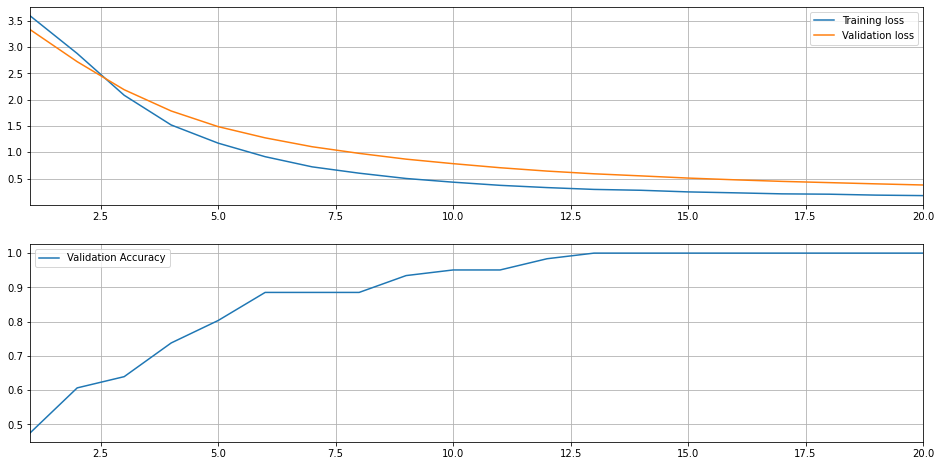

In [36]:
%%time
train_val(LogRegSGD, tr_dl, val_dl, criterion='SGD', epochs=20, lr=0.1);

Now we can test our model against some examples with our prediction function.

In [37]:
%%time
print(predict(LogRegSGD, gerd))

GERD
Wall time: 998 µs


In [38]:
%%time
print(predict(LogRegSGD, cc))

Common Cold
Wall time: 0 ns


In [39]:
%%time
print(predict(LogRegSGD, hepc))

Hepatitis C
Wall time: 0 ns


In [40]:
%%time
print(predict(LogRegSGD, hepd))

Hepatitis D
Wall time: 0 ns


#### Adam Optimiser

We define our Logistic Regression with Adam optimiser using Pytorch nn.Sequential.

In [41]:
LogReg = nn.Sequential(
    nn.Linear(in_features=132,  out_features=num_classes)
).to(device)

LogReg

Sequential(
  (0): Linear(in_features=132, out_features=41, bias=True)
)

We train and validate the model using our train_val function.

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 1	Training loss: 3.4531	Validation loss: 3.1007	Validation accuracy: 0.74


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 2	Training loss: 2.7291	Validation loss: 2.5414	Validation accuracy: 0.85


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 3	Training loss: 2.1290	Validation loss: 2.1039	Validation accuracy: 0.87


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 4	Training loss: 1.6516	Validation loss: 1.7754	Validation accuracy: 0.90


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 5	Training loss: 1.3708	Validation loss: 1.5377	Validation accuracy: 0.93


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 6	Training loss: 1.1159	Validation loss: 1.3461	Validation accuracy: 0.95


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 7	Training loss: 0.9473	Validation loss: 1.1932	Validation accuracy: 0.95


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 8	Training loss: 0.8294	Validation loss: 1.0694	Validation accuracy: 0.97


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 9	Training loss: 0.7142	Validation loss: 0.9678	Validation accuracy: 0.97


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 10	Training loss: 0.6367	Validation loss: 0.8853	Validation accuracy: 0.98


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 11	Training loss: 0.5675	Validation loss: 0.8141	Validation accuracy: 0.98


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 12	Training loss: 0.5278	Validation loss: 0.7543	Validation accuracy: 0.98


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 13	Training loss: 0.4693	Validation loss: 0.6998	Validation accuracy: 1.00


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 14	Training loss: 0.4324	Validation loss: 0.6556	Validation accuracy: 1.00


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 15	Training loss: 0.3966	Validation loss: 0.6163	Validation accuracy: 1.00


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 16	Training loss: 0.3748	Validation loss: 0.5861	Validation accuracy: 1.00


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 17	Training loss: 0.3563	Validation loss: 0.5586	Validation accuracy: 1.00


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 18	Training loss: 0.3284	Validation loss: 0.5331	Validation accuracy: 1.00


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 19	Training loss: 0.3149	Validation loss: 0.5098	Validation accuracy: 1.00


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 20	Training loss: 0.2974	Validation loss: 0.4889	Validation accuracy: 1.00
Wall time: 1.36 s


([3.4531298,
  2.7290866,
  2.1289506,
  1.6515565,
  1.370753,
  1.1159348,
  0.947323,
  0.8293824,
  0.7141702,
  0.63667345,
  0.5675255,
  0.5277769,
  0.46930104,
  0.43235427,
  0.39659885,
  0.37478822,
  0.35631576,
  0.32840723,
  0.3149041,
  0.29743457],
 [3.1006646,
  2.541441,
  2.103937,
  1.7753747,
  1.5376577,
  1.3461142,
  1.1931751,
  1.0694146,
  0.9677997,
  0.8853354,
  0.8141094,
  0.75434357,
  0.69976485,
  0.6555752,
  0.61627346,
  0.586101,
  0.55857223,
  0.533143,
  0.5098353,
  0.48893428])

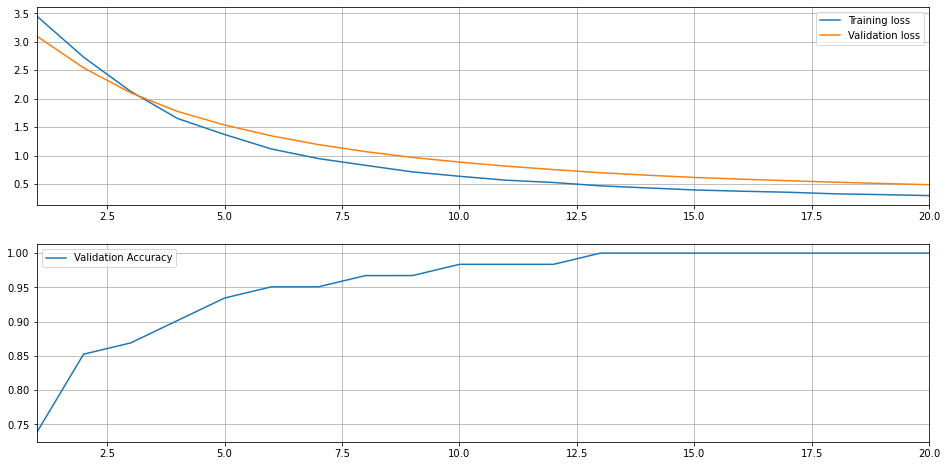

In [42]:
%%time
train_val(LogReg, tr_dl, val_dl, criterion='Adam', epochs=20, lr=0.01);

Now we can test our model against some examples with our prediction function.

In [43]:
%%time
print(predict(LogReg, gerd))

GERD
Wall time: 979 µs


In [44]:
%%time
print(predict(LogReg, cc))

Common Cold
Wall time: 0 ns


In [45]:
%%time
print(predict(LogReg, hepc))

Hepatitis C
Wall time: 0 ns


In [46]:
%%time
print(predict(LogReg, hepd))

Hepatitis D
Wall time: 1 ms


### ANN

#### SGD Optimiser

We define our Artificial Neural Network with SGD optimiser using Pytorch nn.Sequential.

In [47]:
ANN_SGD = nn.Sequential(
    nn.Linear(in_features=132, out_features=200), nn.ReLU(), nn.Dropout(0.5),
    nn.Linear(in_features=200, out_features=400), nn.ReLU(), nn.Dropout(0.5),
    nn.Linear(in_features=400, out_features=200), nn.ReLU(), nn.Dropout(0.5),
    nn.Linear(in_features=200, out_features=num_classes)
).to(device)

ANN_SGD

Sequential(
  (0): Linear(in_features=132, out_features=200, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=200, out_features=400, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=400, out_features=200, bias=True)
  (7): ReLU()
  (8): Dropout(p=0.5, inplace=False)
  (9): Linear(in_features=200, out_features=41, bias=True)
)

We train and validate the model using our train_val function.

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 1	Training loss: 3.7090	Validation loss: 3.7161	Validation accuracy: 0.00


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 2	Training loss: 3.6986	Validation loss: 3.7184	Validation accuracy: 0.02


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 3	Training loss: 3.6842	Validation loss: 3.7269	Validation accuracy: 0.02


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 4	Training loss: 3.6652	Validation loss: 3.7282	Validation accuracy: 0.02


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 5	Training loss: 3.6304	Validation loss: 3.7268	Validation accuracy: 0.03


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 6	Training loss: 3.5890	Validation loss: 3.7150	Validation accuracy: 0.02


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 7	Training loss: 3.5227	Validation loss: 3.6962	Validation accuracy: 0.00


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 8	Training loss: 3.4140	Validation loss: 3.5854	Validation accuracy: 0.08


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 9	Training loss: 3.2768	Validation loss: 3.3836	Validation accuracy: 0.10


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 10	Training loss: 3.0439	Validation loss: 3.0871	Validation accuracy: 0.13


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 11	Training loss: 2.7661	Validation loss: 2.8180	Validation accuracy: 0.15


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 12	Training loss: 2.4977	Validation loss: 2.5745	Validation accuracy: 0.30


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 13	Training loss: 2.2722	Validation loss: 2.4785	Validation accuracy: 0.23


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 14	Training loss: 2.2143	Validation loss: 2.2908	Validation accuracy: 0.43


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 15	Training loss: 2.0198	Validation loss: 2.3305	Validation accuracy: 0.26


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 16	Training loss: 1.8866	Validation loss: 2.0267	Validation accuracy: 0.52


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 17	Training loss: 1.6371	Validation loss: 1.8162	Validation accuracy: 0.52


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 18	Training loss: 1.5468	Validation loss: 1.6682	Validation accuracy: 0.62


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 19	Training loss: 1.4219	Validation loss: 1.6527	Validation accuracy: 0.57


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 20	Training loss: 1.3161	Validation loss: 1.4268	Validation accuracy: 0.62


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 21	Training loss: 1.2110	Validation loss: 1.3745	Validation accuracy: 0.61


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 22	Training loss: 1.1235	Validation loss: 1.1885	Validation accuracy: 0.67


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 23	Training loss: 1.0441	Validation loss: 1.1990	Validation accuracy: 0.59


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 24	Training loss: 0.9512	Validation loss: 1.0366	Validation accuracy: 0.66


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 25	Training loss: 0.9700	Validation loss: 0.9078	Validation accuracy: 0.70


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 26	Training loss: 0.8549	Validation loss: 0.9477	Validation accuracy: 0.69


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 27	Training loss: 0.8079	Validation loss: 0.9053	Validation accuracy: 0.72


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 28	Training loss: 0.7279	Validation loss: 0.7972	Validation accuracy: 0.75


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 29	Training loss: 0.6514	Validation loss: 0.6768	Validation accuracy: 0.77


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 30	Training loss: 0.5839	Validation loss: 0.6014	Validation accuracy: 0.79


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 31	Training loss: 0.6920	Validation loss: 0.5367	Validation accuracy: 0.80


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 32	Training loss: 0.5654	Validation loss: 0.5257	Validation accuracy: 0.89


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 33	Training loss: 0.5339	Validation loss: 0.4638	Validation accuracy: 0.85


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 34	Training loss: 0.4579	Validation loss: 0.4198	Validation accuracy: 0.87


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 35	Training loss: 0.4906	Validation loss: 0.4197	Validation accuracy: 0.84


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 36	Training loss: 0.5470	Validation loss: 0.3798	Validation accuracy: 0.89


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 37	Training loss: 0.3627	Validation loss: 0.3440	Validation accuracy: 0.93


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 38	Training loss: 0.4708	Validation loss: 0.3753	Validation accuracy: 0.87


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 39	Training loss: 0.4514	Validation loss: 0.3171	Validation accuracy: 0.89


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 40	Training loss: 0.3949	Validation loss: 0.2418	Validation accuracy: 0.95


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 41	Training loss: 0.3529	Validation loss: 0.2773	Validation accuracy: 0.93


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 42	Training loss: 0.3165	Validation loss: 0.2785	Validation accuracy: 0.92


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 43	Training loss: 0.3874	Validation loss: 0.2735	Validation accuracy: 0.89


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 44	Training loss: 0.2582	Validation loss: 0.2656	Validation accuracy: 0.92


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 45	Training loss: 0.2595	Validation loss: 0.1796	Validation accuracy: 0.97


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 46	Training loss: 0.3053	Validation loss: 0.1540	Validation accuracy: 0.95


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 47	Training loss: 0.2117	Validation loss: 0.1327	Validation accuracy: 0.97


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 48	Training loss: 0.2558	Validation loss: 0.0947	Validation accuracy: 1.00


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 49	Training loss: 0.1964	Validation loss: 0.1024	Validation accuracy: 1.00


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 50	Training loss: 0.2769	Validation loss: 0.1031	Validation accuracy: 0.98
Wall time: 4.45 s


([3.7090034,
  3.6985817,
  3.684168,
  3.6651623,
  3.6303654,
  3.5890198,
  3.5226667,
  3.414013,
  3.276775,
  3.0438995,
  2.7661254,
  2.497734,
  2.272192,
  2.214332,
  2.019826,
  1.8866427,
  1.6371458,
  1.5468428,
  1.4218855,
  1.3160862,
  1.2109969,
  1.1235285,
  1.0440753,
  0.9511523,
  0.96997494,
  0.8549166,
  0.80787575,
  0.7278631,
  0.6513556,
  0.5839288,
  0.6919612,
  0.56542003,
  0.53388923,
  0.4579456,
  0.4905705,
  0.54698956,
  0.36268514,
  0.47080135,
  0.45144954,
  0.39490026,
  0.35285813,
  0.31647298,
  0.38739735,
  0.2581907,
  0.2595263,
  0.30526692,
  0.21171096,
  0.255787,
  0.19640358,
  0.27685452],
 [3.7161043,
  3.7183843,
  3.7268858,
  3.7281885,
  3.7268019,
  3.7149522,
  3.6962411,
  3.5853884,
  3.3835588,
  3.0870552,
  2.8179915,
  2.5745137,
  2.4785151,
  2.2907825,
  2.3304756,
  2.0266728,
  1.8162206,
  1.6682136,
  1.6526693,
  1.4268264,
  1.3745204,
  1.1885222,
  1.1990441,
  1.0366266,
  0.90775067,
  0.9476675,
  

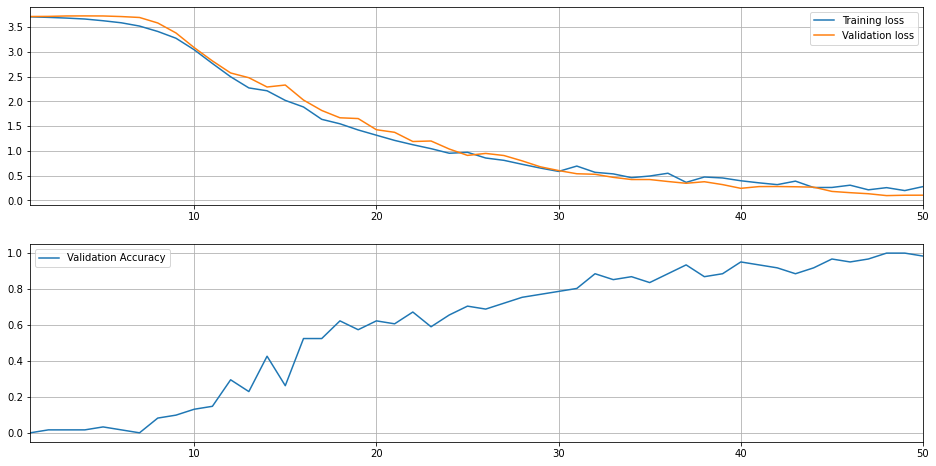

In [48]:
%%time
train_val(ANN_SGD, tr_dl, val_dl, criterion='SGD', epochs=50, lr=0.05);

Now we can test our model against some examples with our prediction function.

In [49]:
%%time
print(predict(ANN_SGD, gerd))

GERD
Wall time: 999 µs


In [50]:
%%time
print(predict(ANN_SGD, cc))

Common Cold
Wall time: 998 µs


In [51]:
%%time
print(predict(ANN_SGD, hepc))

Hepatitis C
Wall time: 987 µs


In [52]:
%%time
print(predict(ANN_SGD, hepd))

Hepatitis D
Wall time: 994 µs


#### Adam Optimiser

We define our Artificial Neural Network with Adam optimiser using Pytorch nn.Sequential.

In [53]:
ANN = nn.Sequential(
    nn.Linear(in_features=132, out_features=200), nn.ReLU(), nn.Dropout(0.5),
    nn.Linear(in_features=200, out_features=400), nn.ReLU(), nn.Dropout(0.5),
    nn.Linear(in_features=400, out_features=200), nn.ReLU(), nn.Dropout(0.5),
    nn.Linear(in_features=200, out_features=num_classes)
).to(device)

ANN

Sequential(
  (0): Linear(in_features=132, out_features=200, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=200, out_features=400, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=400, out_features=200, bias=True)
  (7): ReLU()
  (8): Dropout(p=0.5, inplace=False)
  (9): Linear(in_features=200, out_features=41, bias=True)
)

We train and validate the model using our train_val function.

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 1	Training loss: 3.7073	Validation loss: 3.7037	Validation accuracy: 0.03


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 2	Training loss: 3.6744	Validation loss: 3.6827	Validation accuracy: 0.10


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 3	Training loss: 3.6145	Validation loss: 3.6462	Validation accuracy: 0.13


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 4	Training loss: 3.5217	Validation loss: 3.5758	Validation accuracy: 0.13


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 5	Training loss: 3.3312	Validation loss: 3.4932	Validation accuracy: 0.13


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 6	Training loss: 3.1976	Validation loss: 3.3011	Validation accuracy: 0.18


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 7	Training loss: 2.9533	Validation loss: 3.0395	Validation accuracy: 0.16


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 8	Training loss: 2.6630	Validation loss: 2.7935	Validation accuracy: 0.21


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 9	Training loss: 2.3499	Validation loss: 2.5348	Validation accuracy: 0.38


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 10	Training loss: 2.1923	Validation loss: 2.3326	Validation accuracy: 0.38


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 11	Training loss: 1.9364	Validation loss: 2.1526	Validation accuracy: 0.49


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 12	Training loss: 1.8120	Validation loss: 1.9659	Validation accuracy: 0.56


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 13	Training loss: 1.6270	Validation loss: 1.8512	Validation accuracy: 0.54


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 14	Training loss: 1.4520	Validation loss: 1.6844	Validation accuracy: 0.64


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 15	Training loss: 1.2660	Validation loss: 1.5227	Validation accuracy: 0.62


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 16	Training loss: 1.1994	Validation loss: 1.3862	Validation accuracy: 0.64


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 17	Training loss: 0.9956	Validation loss: 1.2616	Validation accuracy: 0.67


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 18	Training loss: 0.9135	Validation loss: 1.1204	Validation accuracy: 0.69


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 19	Training loss: 0.9292	Validation loss: 1.0157	Validation accuracy: 0.72


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 20	Training loss: 0.7112	Validation loss: 0.8815	Validation accuracy: 0.79


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 21	Training loss: 0.6513	Validation loss: 0.7808	Validation accuracy: 0.80


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 22	Training loss: 0.6429	Validation loss: 0.7216	Validation accuracy: 0.80


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 23	Training loss: 0.5380	Validation loss: 0.6471	Validation accuracy: 0.84


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 24	Training loss: 0.4686	Validation loss: 0.5723	Validation accuracy: 0.82


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 25	Training loss: 0.4437	Validation loss: 0.4898	Validation accuracy: 0.89


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 26	Training loss: 0.4479	Validation loss: 0.4389	Validation accuracy: 0.89


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 27	Training loss: 0.3117	Validation loss: 0.3978	Validation accuracy: 0.92


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 28	Training loss: 0.3247	Validation loss: 0.3420	Validation accuracy: 0.97


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 29	Training loss: 0.3155	Validation loss: 0.2808	Validation accuracy: 0.98


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 30	Training loss: 0.3063	Validation loss: 0.2590	Validation accuracy: 0.97


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 31	Training loss: 0.3073	Validation loss: 0.2678	Validation accuracy: 0.97


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 32	Training loss: 0.2716	Validation loss: 0.2395	Validation accuracy: 0.95


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 33	Training loss: 0.2250	Validation loss: 0.2189	Validation accuracy: 0.97


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 34	Training loss: 0.2254	Validation loss: 0.1620	Validation accuracy: 0.98


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 35	Training loss: 0.1905	Validation loss: 0.1330	Validation accuracy: 1.00


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 36	Training loss: 0.1814	Validation loss: 0.1311	Validation accuracy: 1.00


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 37	Training loss: 0.1620	Validation loss: 0.1205	Validation accuracy: 1.00


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 38	Training loss: 0.1894	Validation loss: 0.1043	Validation accuracy: 1.00


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 39	Training loss: 0.1498	Validation loss: 0.0824	Validation accuracy: 1.00


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 40	Training loss: 0.1543	Validation loss: 0.0729	Validation accuracy: 1.00


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 41	Training loss: 0.1326	Validation loss: 0.0643	Validation accuracy: 1.00


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 42	Training loss: 0.1359	Validation loss: 0.0617	Validation accuracy: 1.00


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 43	Training loss: 0.1464	Validation loss: 0.0585	Validation accuracy: 1.00


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 44	Training loss: 0.1194	Validation loss: 0.0542	Validation accuracy: 1.00


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 45	Training loss: 0.1479	Validation loss: 0.0628	Validation accuracy: 1.00


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 46	Training loss: 0.1175	Validation loss: 0.0791	Validation accuracy: 1.00


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 47	Training loss: 0.1145	Validation loss: 0.0543	Validation accuracy: 1.00


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 48	Training loss: 0.1213	Validation loss: 0.0446	Validation accuracy: 1.00


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 49	Training loss: 0.0915	Validation loss: 0.0449	Validation accuracy: 1.00


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 50	Training loss: 0.1092	Validation loss: 0.0406	Validation accuracy: 1.00
Wall time: 6.05 s


([3.7073164,
  3.6744127,
  3.6145191,
  3.5216513,
  3.331162,
  3.1975687,
  2.953291,
  2.662972,
  2.3499222,
  2.1922727,
  1.9363871,
  1.8119836,
  1.6269622,
  1.4520016,
  1.2659787,
  1.1993594,
  0.9956006,
  0.91354287,
  0.92916894,
  0.71120304,
  0.6513442,
  0.6429374,
  0.53801525,
  0.46862286,
  0.44370097,
  0.44794005,
  0.3117432,
  0.3246739,
  0.31548566,
  0.30628192,
  0.30726832,
  0.27158862,
  0.22495106,
  0.22543243,
  0.1905173,
  0.18144569,
  0.16197026,
  0.18935427,
  0.14984733,
  0.15426789,
  0.13257527,
  0.13590613,
  0.14636026,
  0.11944113,
  0.14792931,
  0.11745754,
  0.11446292,
  0.12127499,
  0.09153533,
  0.10918419],
 [3.7036614,
  3.682722,
  3.6461682,
  3.575846,
  3.4932387,
  3.3011212,
  3.0394993,
  2.7935364,
  2.5348136,
  2.332588,
  2.1525736,
  1.9658899,
  1.851158,
  1.6843673,
  1.5226662,
  1.3862401,
  1.2615802,
  1.1204003,
  1.0157083,
  0.8814732,
  0.7807701,
  0.7215895,
  0.6470624,
  0.5722647,
  0.48981985,
  

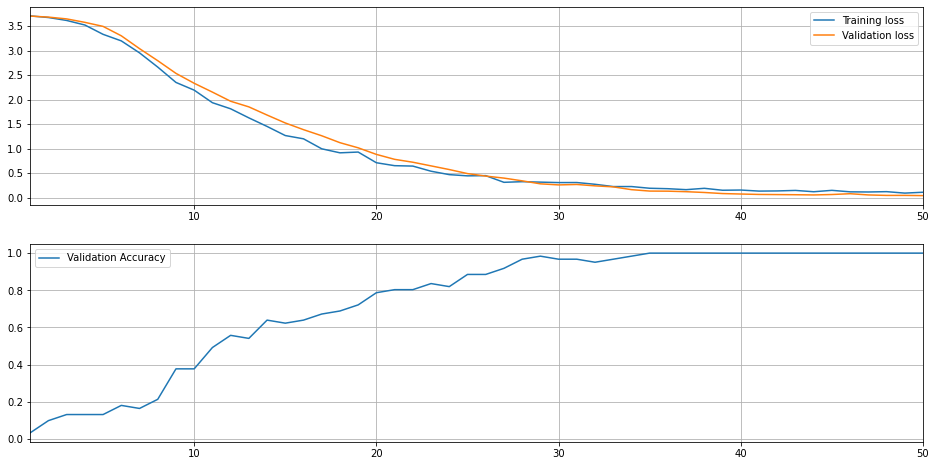

In [54]:
%%time
train_val(ANN, tr_dl, val_dl, epochs=50, lr=0.001);

Now we can test our model against some examples with our prediction function.

In [55]:
%%time
print(predict(ANN, gerd))

GERD
Wall time: 997 µs


In [56]:
%%time
print(predict(ANN, cc))

Common Cold
Wall time: 997 µs


In [57]:
%%time
print(predict(ANN, hepd))

Hepatitis D
Wall time: 998 µs


### Naive Bayes

Identifying unique categories in reponses for the dataset.

In [58]:
categories = np.unique(i2c[y])
categories

array(['(vertigo) Paroymsal  Positional Vertigo', 'AIDS', 'Acne',
       'Alcoholic hepatitis', 'Allergy', 'Arthritis', 'Bronchial Asthma',
       'Cervical spondylosis', 'Chicken pox', 'Chronic cholestasis',
       'Common Cold', 'Dengue', 'Diabetes ',
       'Dimorphic hemmorhoids(piles)', 'Drug Reaction',
       'Fungal infection', 'GERD', 'Gastroenteritis', 'Heart attack',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Hypertension ', 'Hyperthyroidism', 'Hypoglycemia',
       'Hypothyroidism', 'Impetigo', 'Jaundice', 'Malaria', 'Migraine',
       'Osteoarthristis', 'Paralysis (brain hemorrhage)',
       'Peptic ulcer diseae', 'Pneumonia', 'Psoriasis', 'Tuberculosis',
       'Typhoid', 'Urinary tract infection', 'Varicose veins',
       'hepatitis A'], dtype=object)

Identifying training inputs (train_x) and outputs (train_y).

In [59]:
train_x,train_y = Xtr, i2c[ytr]
train_x,train_y

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0]]),
 array(['Malaria', 'Osteoarthristis', 'Varicose veins',
        'Urinary tract infection', 'Migraine', 'Dengue', 'Common Cold',
        'Dimorphic hemmorhoids(piles)', 'Chronic cholestasis',
        'Hepatitis E', '(vertigo) Paroymsal  Positional Vertigo',
        'Malaria', 'Dimorphic hemmorhoids(piles)', 'Bronchial Asthma',
        'Osteoarthristis', 'Peptic ulcer diseae', 'Hepatitis B',
        'Chronic cholestasis', 'Alcoholic hepatitis', 'Hepatitis C',
        'Chicken pox', 'Allergy', 'Psoriasis', 'Cervical spondylosis',
        'Acne', 'Osteoarthristis', 'Allergy', 'Hepatitis D',
        'Alcoholic hepatitis', 'Varicose veins', 'Hepatitis D', 'Typhoid',
        'Typhoid', 'Urinary tract infection', 'Hepatitis D', 'Hepatitis B',
        'Tuberculosis', 'Hyperthyroidism',

Identifying how many training examples (tr_examples) are there and how many variables (features) are there.

In [60]:
tr_examples, features  = np.shape(train_x)
tr_examples, features

(243, 132)

Identifying validation data

In [61]:
test_x,test_y = Xval, i2c[yval]
test_x,test_y

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array(['GERD', 'Psoriasis', 'Arthritis', 'Arthritis', 'Jaundice',
        'Common Cold', 'Cervical spondylosis', 'Chronic cholestasis',
        'Gastroenteritis', 'Tuberculosis', 'Common Cold',
        'Peptic ulcer diseae', '(vertigo) Paroymsal  Positional Vertigo',
        'Hypoglycemia', 'Pneumonia', 'Arthritis', 'Dengue', 'Acne',
        'Common Cold', 'Paralysis (brain hemorrhage)', 'Hepatitis C',
        'Hyperthyroidism', 'Chicken pox', 'Gastroenteritis', 'Common Cold',
        'Hypothyroidism', 'Hepatitis D', 'Psoriasis',
        'Urinary tract infection', 'Hepatitis B', 'Hepatitis D', 'Malaria',
        'Hepatitis C', 'Hepatitis E', 'Hyperthyroidism', 'Gastroenteritis',
        'AIDS', 'Drug Reaction', 'hepatitis A', 'Migraine', 'Migraine',
        'Hepatitis D', 'Os

Identifying how many validation examples (test_examples) are there and how many variables (test_features) are there.

In [62]:
test_examples, test_features  = np.shape(test_x)
test_examples, test_features

(61, 132)

Here prior probabilities are calculated by iterating through training set and calculating the probability that each symptom be present for each category.

In [63]:
def patient(dataarray):
    len_data = len(dataarray)
    #Counter gets count of each element in array
    initialprob = dict(Counter(dataarray))
    for disease in initialprob.keys():
        initialprob [disease] /=  float(len_data)
    return initialprob

Since the features are binary, we are going to implement bernoulli naive bayes. This classfier calculates probability of a given input to belong for each category. The category with the highest probability is chosen as the correct category.

In [64]:
def nbayes(data_x, data_y, test_x):
  
  categories=np.unique(data_y)
  r,c=np.shape(data_x)
  prob = {}
  for n in categories:
    #defaultdict creates dictionary and creates automatic keys and values for missing
    prob[n] = defaultdict(list)
 
  category_prob_array = patient(data_y)
 
  for n in categories:
    r_index = np.where(data_y == n)[0]
    subset = data_x[r_index, :]
    rr, cc = np.shape(subset)
    for k in range(0,cc):
      prob[n][k] += list(subset[:,k])
 
  for n in categories:
    for k in range(0,c):
      prob[n][k] = patient(prob[n][k])
 
  output = {}
  ans={}

  # print("Calculated conditional probabilites for each category")

  #calculation of conditional probability
  for i in range(0,test_examples):
    for n in categories:
      category_prob = category_prob_array[n]
        
      for k in range(0,test_features):
        rel_prob = prob[n][k]
        if test_x[i][k] in rel_prob.keys():
          category_prob *= rel_prob[test_x[i][k]]
       
        output[n] = category_prob
        #taking maximum probability to classify
        ans[i]=max(output, key=output.get)
    
    # print(output)
  print("\n\n")
  print("Predicted response for validation data")
  print(ans)
  print("\n\n")

  count=0
  cnt=0

  #calculating accuracy, count of correct classifications divided by total validation sample size
  for j in ans.values():
    if j==test_y[cnt]:
      cnt += 1
      count +=1
    else:
      cnt += 1
      count+=0
  print("accuracy =", count/test_examples*100, "%")

We run the function and are given the predicted results and the classification accuracy.

In [65]:
nbayes(train_x, train_y, test_x)




Predicted response for validation data
{0: 'GERD', 1: 'Psoriasis', 2: 'Arthritis', 3: 'Arthritis', 4: 'Jaundice', 5: 'Common Cold', 6: 'Cervical spondylosis', 7: 'Chronic cholestasis', 8: 'Paralysis (brain hemorrhage)', 9: 'Tuberculosis', 10: 'Common Cold', 11: 'Peptic ulcer diseae', 12: '(vertigo) Paroymsal  Positional Vertigo', 13: 'Hypoglycemia', 14: 'Pneumonia', 15: 'Arthritis', 16: 'Dengue', 17: 'Acne', 18: 'Common Cold', 19: 'Paralysis (brain hemorrhage)', 20: 'Hepatitis C', 21: 'Hyperthyroidism', 22: 'Chicken pox', 23: 'Paralysis (brain hemorrhage)', 24: 'Common Cold', 25: 'Hypothyroidism', 26: 'Hepatitis D', 27: 'Psoriasis', 28: 'Urinary tract infection', 29: 'Hepatitis B', 30: 'Hepatitis D', 31: 'Malaria', 32: 'Hepatitis C', 33: 'Hepatitis E', 34: 'Hyperthyroidism', 35: 'Gastroenteritis', 36: 'AIDS', 37: 'Drug Reaction', 38: 'hepatitis A', 39: 'Migraine', 40: 'Migraine', 41: 'Hepatitis D', 42: 'Osteoarthristis', 43: 'Drug Reaction', 44: 'Chronic cholestasis', 45: 'Impetigo'

# Chatbot

## Reading Data

In [66]:
df_c = pd.read_csv('dataset.csv')
df_c.head(20)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
df_c.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Paralysis (brain hemorrhage),vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,stomach_bleeding,chest_pain,chest_pain,loss_of_smell,muscle_pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [68]:
df_c.isnull().sum() #Checking null values for each column

Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64

## Data Pre-processing

In [69]:
cols = df_c.columns
data = df_c[cols].values.flatten()
values=df_c.values.flatten() #array contaning all column values.

 squeezing array into series object to remove spaces within each string

In [70]:
s = pd.Series(data) 
s = s.str.strip()
s = s.values.reshape(df_c.shape)

In [71]:
df_c = pd.DataFrame(s, columns=df_c.columns)
df_c = df_c.fillna('')#filling all nan values to empty string
df_c.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,,,,,,,,,,,,,
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,,,,,,,,,,,,,,
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,,,,,,,,,,,,,,
3,Fungal infection,itching,skin_rash,dischromic _patches,,,,,,,,,,,,,,
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,,,,,,,,,,,,,,


voiding weightless symptoms 

In [72]:

df_c = df_c.replace('dischromic _patches','') 
df_c = df_c.replace('spotting_ urination','')
df_c = df_c.replace('foul_smell_of urine','')
df_c.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,,,,,,,,,,,,,,
1,Fungal infection,skin_rash,nodal_skin_eruptions,,,,,,,,,,,,,,,
2,Fungal infection,itching,nodal_skin_eruptions,,,,,,,,,,,,,,,
3,Fungal infection,itching,skin_rash,,,,,,,,,,,,,,,
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,,,,,,,,,,,,,,


In [73]:
print(f'duplicated rows = {df_c.duplicated().sum()}, non-duplicated rows = {(~df_c.duplicated()).sum()}')

duplicated rows = 4618, non-duplicated rows = 302


In [74]:
df_c.loc[df_c.duplicated(keep='first'),:]

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,,,,,,,,,,,,,,
5,Fungal infection,skin_rash,nodal_skin_eruptions,,,,,,,,,,,,,,,
6,Fungal infection,itching,nodal_skin_eruptions,,,,,,,,,,,,,,,
7,Fungal infection,itching,skin_rash,,,,,,,,,,,,,,,
8,Fungal infection,itching,skin_rash,nodal_skin_eruptions,,,,,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,,,,,,,,,,,
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,,,,,,,,,,,,,
4917,Urinary tract infection,burning_micturition,bladder_discomfort,,continuous_feel_of_urine,,,,,,,,,,,,,
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,,,,,,,,,,,


In [75]:
print(f'duplicated rows = {df_c.duplicated().sum()}, non-duplicated rows = {(~df_c.duplicated()).sum()}')

duplicated rows = 4618, non-duplicated rows = 302


In [76]:
df_c.drop_duplicates(keep='first',inplace=True)

In [77]:
df_c

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,,,,,,,,,,,,,,
1,Fungal infection,skin_rash,nodal_skin_eruptions,,,,,,,,,,,,,,,
2,Fungal infection,itching,nodal_skin_eruptions,,,,,,,,,,,,,,,
3,Fungal infection,itching,skin_rash,,,,,,,,,,,,,,,
10,Allergy,continuous_sneezing,shivering,chills,watering_from_eyes,,,,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,Impetigo,high_fever,blister,red_sore_around_nose,yellow_crust_ooze,,,,,,,,,,,,,
403,Impetigo,skin_rash,blister,red_sore_around_nose,yellow_crust_ooze,,,,,,,,,,,,,
405,Impetigo,skin_rash,high_fever,red_sore_around_nose,yellow_crust_ooze,,,,,,,,,,,,,
406,Impetigo,skin_rash,high_fever,blister,yellow_crust_ooze,,,,,,,,,,,,,


In [78]:
df_c.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,302,302,302,302,302,302,302,302,302,302,302,302,302,302,302,302,302,302
unique,41,34,48,53,49,38,33,27,22,23,22,19,12,9,5,4,4,2
top,Migraine,vomiting,vomiting,fatigue,,,,,,,,,,,,,,
freq,10,46,56,46,36,69,116,144,162,182,192,234,255,272,283,284,292,301


In [79]:
df_c.isnull().sum() #Checking null values for each column

Disease       0
Symptom_1     0
Symptom_2     0
Symptom_3     0
Symptom_4     0
Symptom_5     0
Symptom_6     0
Symptom_7     0
Symptom_8     0
Symptom_9     0
Symptom_10    0
Symptom_11    0
Symptom_12    0
Symptom_13    0
Symptom_14    0
Symptom_15    0
Symptom_16    0
Symptom_17    0
dtype: int64

Creating `Json File` containing all tags, patterns and answers.

In [80]:
diseases=list(set(df_c['Disease'])) #list of symptoms
diseases

['Fungal infection',
 'GERD',
 'Osteoarthristis',
 'Varicose veins',
 'Hypoglycemia',
 'Hypothyroidism',
 'Chronic cholestasis',
 'Hepatitis D',
 'Heart attack',
 'Psoriasis',
 'Hepatitis C',
 'Chicken pox',
 'Urinary tract infection',
 'Bronchial Asthma',
 'Tuberculosis',
 'Jaundice',
 'Drug Reaction',
 'Impetigo',
 'hepatitis A',
 'Typhoid',
 'AIDS',
 'Dimorphic hemmorhoids(piles)',
 '(vertigo) Paroymsal  Positional Vertigo',
 'Cervical spondylosis',
 'Gastroenteritis',
 'Alcoholic hepatitis',
 'Acne',
 'Dengue',
 'Common Cold',
 'Migraine',
 'Malaria',
 'Pneumonia',
 'Hypertension',
 'Allergy',
 'Arthritis',
 'Peptic ulcer diseae',
 'Hyperthyroidism',
 'Paralysis (brain hemorrhage)',
 'Hepatitis B',
 'Hepatitis E',
 'Diabetes']

In [81]:
jsonFile={'intents':[]}
for i,disease in enumerate(diseases):
    jsonFile['intents'].append(dict([('tag',disease),('patterns',[]),('responses',['you have '+disease])]))

In [82]:
print(f'Data Frame Shape After Cleaning = {df_c.shape}')

Data Frame Shape After Cleaning = (302, 18)


Populating the Json file with patterns

In [83]:
for i in trange(df_c.shape[0]):#For all examples
    for j in trange(len(jsonFile['intents'])):
        if jsonFile['intents'][j]['tag'] == df_c.iloc[i,0]: #Checking the disease of each instance of dataset
            tag=jsonFile['intents'][j]['tag'] #saving disease in variable tag
            row=list(set(list(df_c.iloc[i,1:]))) #all symptoms of particular instance are listed
            row=' '.join(row) # all elements of the list are joined in a one string where cells are seperated with space 
            row=re.sub(tag,'',row)
            jsonFile['intents'][j]['patterns'].append(row) # Populating the patterns with symptoms
            break 
    

  0%|          | 0/302 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Example of the structure of a `class label`.

In [84]:
jsonFile['intents'][0]

{'tag': 'Fungal infection',
 'patterns': [' itching skin_rash nodal_skin_eruptions',
  ' skin_rash nodal_skin_eruptions',
  ' itching nodal_skin_eruptions',
  ' itching skin_rash'],
 'responses': ['you have Fungal infection']}

`greetings` and `goodbye` classes are added to exhibit medical doctor and patient interaction

In [85]:
greetings = {'tag':'greetings','patterns':['Hi','Hello','Hi there','How are you?','Good morning','Good evening','Is anyone here'],
 'responses':['Hi, Im Dr.Stone. Please enter your symptoms so that I can diagnose your condition']}

In [86]:
goodbye = {'tag':'goodbye','patterns':['Bye','Thank you','Goodbye','See you later'],'responses':['Wish you a long life. Bye!']}

In [87]:
jsonFile['intents'].append(greetings)
jsonFile['intents'].append(goodbye)


In [106]:
jsonFile['intents']

[{'tag': 'Fungal infection',
  'patterns': [' itching skin_rash nodal_skin_eruptions',
   ' skin_rash nodal_skin_eruptions',
   ' itching nodal_skin_eruptions',
   ' itching skin_rash'],
  'responses': ['you have Fungal infection']},
 {'tag': 'GERD',
  'patterns': [' acidity chest_pain ulcers_on_tongue cough stomach_pain vomiting',
   ' chest_pain ulcers_on_tongue cough stomach_pain vomiting',
   ' acidity chest_pain cough stomach_pain vomiting',
   ' chest_pain ulcers_on_tongue cough stomach_pain acidity',
   ' acidity chest_pain ulcers_on_tongue stomach_pain vomiting',
   ' acidity ulcers_on_tongue cough stomach_pain vomiting',
   ' acidity chest_pain ulcers_on_tongue cough vomiting'],
  'responses': ['you have GERD']},
 {'tag': 'Osteoarthristis',
  'patterns': [' joint_pain hip_joint_pain swelling_joints neck_pain knee_pain painful_walking',
   ' hip_joint_pain swelling_joints neck_pain knee_pain painful_walking',
   ' joint_pain hip_joint_pain swelling_joints knee_pain painful_walk

List of `Disease`class labels

In [107]:
for i in range(43):
    print(jsonFile['intents'][i]['tag'])
    

Fungal infection
GERD
Osteoarthristis
Varicose veins
Hypoglycemia
Hypothyroidism
Chronic cholestasis
Hepatitis D
Heart attack
Psoriasis
Hepatitis C
Chicken pox
Urinary tract infection
Bronchial Asthma
Tuberculosis
Jaundice
Drug Reaction
Impetigo
hepatitis A
Typhoid
AIDS
Dimorphic hemmorhoids(piles)
(vertigo) Paroymsal  Positional Vertigo
Cervical spondylosis
Gastroenteritis
Alcoholic hepatitis
Acne
Dengue
Common Cold
Migraine
Malaria
Pneumonia
Hypertension
Allergy
Arthritis
Peptic ulcer diseae
Hyperthyroidism
Paralysis (brain hemorrhage)
Hepatitis B
Hepatitis E
Diabetes
greetings
goodbye


## Training Data Creation 

Renaming

In [90]:
intents=jsonFile

In [91]:
intents['intents']

A `lemmatizer` object is created 

In [92]:
lemma_object= WordNetLemmatizer()

the concept of `Bag of words` is implemented in a seperate function.

In [93]:
def bag_of_words(tokenized_pattern,vocabulary): #Accepts vocabulary which is the prepared Json file
    tokenized_pattern=[lemma_object.lemmatize(word) for word in tokenized_pattern ]
    bag= np.zeros(len(vocabulary),dtype=int)
    #One Hot Encoding
    for i, word in enumerate(vocabulary):
        if word in tokenized_pattern:
            bag[i]=1
    return bag

     

Creating the `Vocabulary` variable and setting up the `Dataset` where each instance is induced as a tuple. 

In [94]:

vocabulary=[] #List of symptoms
tags=[] #List of diseases
X_y=[] #Dataset
for intent in intents['intents']:
    tag=intent['tag']
    tags.append(tag)
    for pattern in intent['patterns']:
        pattern=re.sub('[^a-zA-Z]',' ',pattern) #Removing anything but letters
        words = nltk.word_tokenize(pattern) #Tokeize the string in a list of words
        vocabulary.extend(words) #Extend is used so that the elements of the array are added individually rather than appended as a list.
        X_y.append((words,tag))
        
vocabulary=[ lemma_object.lemmatize(word.lower()) for word in vocabulary ]  #lowering to small case and lemmatizing words



Sorting and removing the duplicates. 

In [95]:
tags=sorted(set(tags)) 
vocabulary=sorted(set(vocabulary))   

Applying One Hot Encoding for all instances of the dataset `X_y`

In [96]:
x_tr_c = [] 
y_tr_c = []
c2i_c={} #class to index
for (tokenized_pattern,tag) in X_y:
    encoded_pattern = bag_of_words(tokenized_pattern,vocabulary)
    x_tr_c.append(encoded_pattern)
    
    class_label=tags.index(tag) #Assigning a numeric value between 0-40 to each label
    y_tr_c.append(class_label) #list containing labels in order and parallel to X_tr
    c2i_c[tag]=class_label #Class to index {'class':number}

In [97]:
#Converting list to numpy array
x_tr_c=np.array(x_tr_c)
y_tr_c=np.array(y_tr_c)
    

In [98]:
x_tr_c.shape,y_tr_c.shape

((313, 219), (313,))

Splitting Dataset and training model using the `Naive bayes` classifier

In [99]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(x_tr_c,y_tr_c, test_size = 0.20, random_state = seed)

In [100]:
disease_detect_model = MultinomialNB().fit(X_train_c, y_train_c)
y_pred_c=disease_detect_model.predict(X_test_c)

Calculating `confusion matrix` and `accuracy score`

In [101]:
confusion_m = confusion_matrix(y_test_c,y_pred_c)
accuracy=accuracy_score(y_test_c,y_pred_c)

In [102]:
accuracy,confusion_m

(0.9047619047619048,
 array([[2, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        [0, 0, 2, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 2, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 2]], dtype=int64))

The chatbot function. (Please check the GUI implementation where you can have the interaction with the medical chatbot). Check the `ReadMe` File for pointers.

In [103]:
def reply(message):
    words = nltk.word_tokenize(message)#Tokenize input sentence
    bag = bag_of_words(words,vocabulary) # One Hot encoding
    bag = np.reshape(bag,(-1,1)) # Reshaping
    bag = np.transpose(bag) # Transpose
    prediction=disease_detect_model.predict(bag) #Predicting the output
    label=tags[prediction[0]]
    for intent in intents['intents']:
        if label == intent['tag']:
          return intent["responses"][0]

Few testings

In [104]:
message = 'hi there'
rep=reply(message)
rep

'Hi, Im Dr.Stone. Please enter your symptoms so that I can diagnose your condition'

In [105]:
message = 'thank you'
rep=reply(message)
rep

'Wish you a long life. Bye!'